<a href="https://colab.research.google.com/github/sivaharitha-s/Car-price-prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
df=pd.read_csv('car data.csv')
columns = None  # Set to an integer if you want a specific number of columns
rows = None
#pd.set_option('display.max_columns',columns)
#pd.set_option('display.max_rows',rows)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
pd.crosstab(df.Seller_Type,df.Fuel_Type)

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,2,59,134
Individual,0,1,105


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Seller_Type']=le.fit_transform(df['Seller_Type'])
df['Transmission']=le.fit_transform(df['Transmission'])


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
x=df.drop(['Car_Name','Selling_Price'],axis='columns')
y=df['Selling_Price']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1,random_state=42)
reg=LinearRegression()
reg.fit(train_x,train_y)
print(reg.score(test_x,test_y))
print(reg.score(train_x,train_y))


0.8311069476244124
0.8806173715719124


In [ ]:
reg.predict(test_x)

array([ 3.12014646,  8.25233281,  6.09135926, -1.45602499,  9.04591939,
        7.20705063,  1.41640397,  0.86885909,  1.49050471,  7.2365271 ,
        9.07565017,  0.5629711 ,  8.41576881,  3.6432358 ,  6.59152277,
        2.88633915,  0.41843056, 10.87640735,  1.92935588,  2.5353782 ,
        0.37331985,  7.96789412,  6.26813041,  2.40577882,  0.80841342,
        3.50189479,  5.12837742,  2.57390607,  2.32093045,  1.88498645,
        0.37271223])

difference between the actual and predicted price

In [ ]:
b=pd.DataFrame(test_y)
b['predicted_price']=reg.predict(test_x)
b.head(10)

,Selling_Price,predicted_price
177,0.35,3.120146
289,10.11,8.252333
228,4.95,6.091359
198,0.15,-1.456025
60,6.95,9.045919
9,7.45,7.207051
118,1.10,1.416404
154,0.50,0.868859
164,0.45,1.490505
33,6.00,7.236527


Predicted price for our testing data

In [ ]:
a=pd.DataFrame(test_x)
a['preidcted_Price']=reg.predict(test_x)
a['actual_price']=test_y
a.head(10)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,preidcted_Price,actual_price
177,2016,0.57,24000,2,1,0,0,3.120146,0.35
289,2016,13.60,10980,2,0,1,0,8.252333,10.11
228,2012,9.40,60000,1,0,1,0,6.091359,4.95
198,2011,0.57,35000,2,1,1,1,-1.456025,0.15
60,2013,18.61,40001,2,0,1,0,9.045919,6.95
9,2015,8.92,42367,1,0,1,0,7.207051,7.45
118,2015,1.47,26000,2,1,1,0,1.416404,1.10
154,2014,0.88,8000,2,1,1,0,0.868859,0.50
164,2016,0.54,14000,2,1,1,0,1.490505,0.45
33,2014,9.95,45000,1,0,1,0,7.236527,6.00


In [ ]:
error_score=metrics.r2_score(test_y,reg.predict(test_x))
print(error_score)

0.8311069476244124


Visualize the actual price vs predicted price


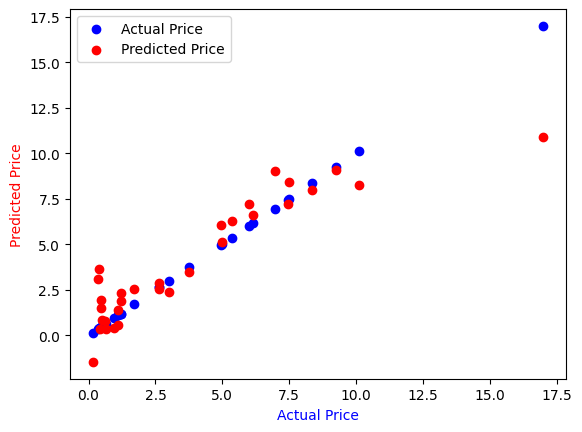

In [ ]:

%matplotlib inline
plt.xlabel('Actual Price', color='blue')  # X-axis label in red
plt.ylabel('Predicted Price', color='red')  # Y-axis label in blue
# Plot actual prices (test_y) as blue dots
plt.scatter(test_y, test_y, color='blue', label='Actual Price')
# Plot predicted prices as red dots
plt.scatter(test_y, reg.predict(test_x), color='red', label='Predicted Price')
plt.legend()
plt.show()

         default vs our own value range
         
alpha     = 1.0            |	0.001 to 1.0

max_iter	=1000	           |1000 to 5000

tol       =0.0001          |	0.0001 to 0.01	T

In [ ]:
lasso_reg=Lasso(alpha=0.1,max_iter=2000,tol=0.01)
lasso_reg.fit(train_x,train_y)
print(" ")
print("lasso regression score")
print("")
print(lasso_reg.score(test_x,test_y))
print(lasso_reg.score(train_x,train_y))
print(" ")
print("linear regression score")
print("")
print(reg.score(test_x,test_y))
print(reg.score(train_x,train_y))

 
lasso regression score

0.8597466544166971
0.8702278284352661
 
linear regression score

0.8311069476244124
0.8806173715719124


Choose the best one


In [ ]:
c=pd.DataFrame(test_y)
c['lasso_price']=lasso_reg.predict(test_x)
c['linear_price']=reg.predict(test_x)
c.head(20)

,Selling_Price,lasso_price,linear_price
177,0.35,2.297175,3.120146
289,10.11,8.598122,8.252333
228,4.95,5.570496,6.091359
198,0.15,-0.424165,-1.456025
60,6.95,9.575595,9.045919
9,7.45,6.723091,7.207051
118,1.10,1.794723,1.416404
154,0.50,1.144753,0.868859
164,0.45,1.833398,1.490505
33,6.00,6.769439,7.236527
